##### Assignment 5 - Linear Regression

## Part 1 - Read your data frame.
The CSV file is "fifa_data.csv"

In [2]:
import pandas as pd
fifa_data = pd.read_csv("fifa_data.csv")
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Part 2 - Display info
Take a look at the information.  Note any features that are missing values.  Note any features that are objects, but could be numerical

In [3]:

fifa_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

### _Notes_
(Your notes here)
Well, the dataset has 89 columns with 18207 rows. 38 float values, 6 integer values and 45 object values. There are some null values too. The coulmn with Loaned Foam has more null values than other columns. Also there are  null values for vision. compouser, and other columns.

## Part 3a - Remove columns (features)
Refer to data_cleaning in the DataFrames directory

The "Loaned From" data feature is sparse and does not help us.

Remove that column from your data frame.

In [4]:
fifa_data1 = fifa_data.copy()
fifa_data1.drop(labels="Loaned From", axis='columns', inplace=True)
fifa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

## Part 3b - Remove rows (data instances)
Refer to data_cleaning in the DataFrames directory

For now, go ahead and remove any instance that is missing any data value.

In [5]:
fifa_data2 = fifa_data.copy()
fifa_data2.dropna(axis='index', how='any', inplace=True)
print(fifa_data2)

Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

[0 rows x 89 columns]


## Part 3c - We want to predict the wages for a player
But the wages in the data frame are not a numerical type.  I have created a handy function that will take the amount and return a numerical value.  Create a new column by mapping the euro_converter function on the "Wage" column.

In [6]:
def euro_converter(string):
    unit = string[0:1]
    value = string[1:len(string)-1]
    multiplier = string[-1]
    if multiplier =="0": return 0
    
    # print(unit, value, multiplier)
    value = float(value)
    if multiplier=="M": value *= 1000000
    if multiplier=="K": value *= 1000
    return value

In [7]:
val = fifa_data["Wage"]
print(val)
values = [euro_converter(x) for x in val]
fifa_data["Wage_Euro"] =values
print(fifa_data)



0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
5        €340K
6        €420K
7        €455K
8        €380K
9         €94K
10       €205K
11       €355K
12       €125K
13       €285K
14       €225K
15       €205K
16       €205K
17       €145K
18       €240K
19       €240K
20       €315K
21       €200K
22       €130K
23       €300K
24       €215K
25       €100K
26       €255K
27       €285K
28       €315K
29       €165K
         ...  
18177      €1K
18178      €1K
18179      €1K
18180      €1K
18181      €1K
18182      €1K
18183      €1K
18184      €1K
18185      €1K
18186      €1K
18187      €1K
18188      €1K
18189      €1K
18190      €1K
18191      €1K
18192      €1K
18193      €1K
18194      €1K
18195      €1K
18196      €1K
18197      €1K
18198      €1K
18199      €1K
18200      €1K
18201      €1K
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object
       Unnamed: 0      ID    ...     Release

## Part 4 - Split the data frame

Use the train_test_split() function to split the data set into training(75%) and test(25%) sets. 

In [34]:
# Your code here
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fifa_data, test_size=0.25, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())
working_set1 = train_set.copy()

13655 4552
       Unnamed: 0      ID    ...     Release Clause  Wage_Euro
4393         4393  214409    ...              €3.2M     8000.0
1933         1933  245682    ...                NaN        0.0
17425       17425  241304    ...              €416K     2000.0
8019         8019  212819    ...              €938K     5000.0
12816       12816  245438    ...              €843K     4000.0

[5 rows x 90 columns]
       Unnamed: 0      ID    ...     Release Clause  Wage_Euro
3113         3113  226773    ...             €14.7M    31000.0
12402       12402  209750    ...              €780K     1000.0
2232         2232  204367    ...                NaN    11000.0
13381       13381  215131    ...              €659K     1000.0
10969       10969  224255    ...              €891K     1000.0

[5 rows x 90 columns]


## Part 5 - Do some scatter plots
Take a look at "Potential", "Overall", and the new wages feature you created using the scatter_matrix

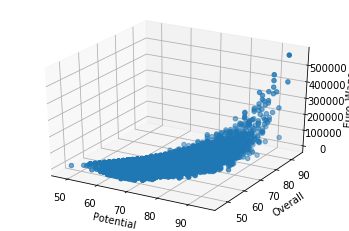

In [36]:
# Your code here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(working_set1["Potential"], working_set1["Overall"], working_set1["Wage_Euro"])

ax.set_xlabel('Potential')
ax.set_ylabel('Overall')
ax.set_zlabel('Euro_Wage')

plt.show()

## Part 6 - Linear Regression
1. Pull out "Overall" for the X and the wage feature you created for y. 
2. Fit the data.
3. Show R2 and Mean Square Error
4. Discuss the results

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = working_set1[["Overall"]]
Y = working_set1["Wage_Euro"]
print(reg.fit(X, Y))
print(reg.score(X,Y))

from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
0.3192096297667141
mean squared error is  351723777.1012648


Discussion: The value for R2 shows that only 32% of the input data has the correct output which is too low for the larger data frame.  Also the mean square error is high perhaps due to the difference in the values between Euro_Wage and Overall. 

## Part 7 - Add features to the Model
1. Pick up to 3 other features that you think might improve the model and use them for X.
2. Fit the data
3. Show the scores
4. Discuss the results

In [43]:
from sklearn.linear_model import LinearRegression
reg_plus_new = LinearRegression()
working_setCopy = working_set1.copy()
X = working_setCopy[["Overall", "Potential"]]
Y = working_setCopy["Wage_Euro"]
reg_plus_new.fit(X, Y)

print(reg_plus_new.score(X,Y))
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)


0.33951511458792905
mean squared error is  342104352.2702059


Discussion: For more simplicity, I added the Potential column in X and it seems like the value is increased with 2% better than the previous result. Maybe the other one works too but the null value shows the error.

## Part 8 - Test Set time
Evaluate the model for r2 and mean square error on the test set and discuss your results in comparison to part 7.

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
working_set2 = test_set.copy()
X = working_set2[["Overall","Potential"]]
Y = working_set2["Wage_Euro"]
print(reg.fit(X, Y))
print(reg.score(X,Y))

from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("mean squared error is ",  mse)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
0.3834169933780426
mean squared error is  237854072.6044573


Discussion: When the test set is plugged under the regression, it is found that the r2 of test set is 38.4% which is 2.3% more than the training set of Part7. Also the mean square error is lower than the training set.

# Bonus options
For each of the options, redo your regression using the new features, report the results and discuss.


1. Look for a better set of features to predict wages.
2. Do a better job of filtering the data.  It looks like there are 18159 instances that have numerical performance values.  Filter unneeded columns so that those 18159 instances remain. 
2. Look at the other columns that contain objects and see if any could be useful in your regression.  Write a map function and apply.  
2. Add in polynomial features.